# Proyecto: Ventas de videojuegos

En la industria de los videojuegos, comprender los factores que influyen en el éxito comercial de un título es fundamental para la toma de decisiones estratégicas. La empresa **Ice**, una tienda en línea dedicada a la venta de videojuegos a nivel mundial, busca mejorar su capacidad para identificar juegos prometedores y optimizar sus campañas publicitarias. Para ello, se analizarán datos históricos que incluyen características como reseñas de usuarios y expertos, género, plataforma, clasificación ESRB, y cifras de ventas.

Este proyecto se sitúa temporalmente en diciembre de 2016. El objetivo es construir una base analítica sólida para predecir el desempeño de los juegos en 2017 utilizando la información disponible hasta el año anterior. Aunque el escenario es ficticio, el enfoque analítico y las habilidades desarrolladas son aplicables a cualquier estudio de mercado en la industria del entretenimiento digital.

# 1. Importar datos y explorar la información

En esta sección se realizará la importación de las librerías necesarias para el desarrollo del proyecto, así como la carga del conjunto de datos de ventas de videojuegos. 

A continuación, se llevará a cabo una revisión preliminar de la información disponible, analizando aspectos clave como la cantidad de valores no nulos en cada columna y los tipos de datos asignados automáticamente por Python. Esta exploración permitirá detectar posibles problemas de calidad en los datos y guiar las siguientes etapas del análisis.

In [12]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
# Importar la base
df = pd.read_csv('games.csv')

# Imprimir primeras filas para garantizar que la importación se hizo de forma adecuada
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
# Imprimir información general de la base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


El conjunto de datos contiene **16,715 registros** y **11 columnas** que abarcan información relevante sobre videojuegos, incluyendo nombre, plataforma, año de lanzamiento, género, ventas por región, puntuaciones de críticos y usuarios, y clasificación ESRB.

Se identifican algunas observaciones clave:

- La columna `Platform` está completa, sin valores nulos.
- Las columnas `Name` y `Genre` tienes **2 valores nulos**, por lo que será necesario evaluar si se deben eliminar esas filas o imputar sus valores.
- La columna `Year_of_Release` presenta **269 valores faltantes**, lo cual podría dificultar los análisis temporales si no se tratan adecuadamente.
- Las columnas relacionadas con ventas por región (`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`) están completas.
- Las variables de puntuación (`Critic_Score` y `User_Score`) contienen una cantidad considerable de valores nulos, especialmente `Critic_Score`, con casi el **51% de datos faltantes**.
- La columna `Rating`, que almacena la clasificación ESRB, también presenta una alta proporción de valores nulos (más del 40%).

Estos hallazgos sugieren la necesidad de realizar un tratamiento cuidadoso de los valores faltantes.

Al revisar los tipos de datos del DataFrame, se observa que la mayoría han sido correctamente interpretados. Sin embargo, existen algunas columnas que requieren un ajuste para facilitar su análisis:

- La columna **`Year_of_Release`** fue interpretada como tipo `float64`. Dado que representa un año calendario, lo más adecuado es convertirla a tipo entero (`int`) para evitar decimales innecesarios y permitir operaciones como agrupación por año.
  
- La columna **`Critic_Score`** también aparece como `float64`.

- La columna **`User_Score`** debería ser de tipo numérico, según la documentación del conjunto de datos. Sin embargo, ha sido interpretada como `object`, lo que sugiere la presencia de valores no numéricos. Será necesario examinar el contenido de esta columna para identificar y corregir los valores que impiden su conversión al tipo adecuado.

A continuación se revisan algunos de los valores que incluyen estas columnas.

In [15]:
# Visualizar los datos en Year_of_Release 
df['Year_of_Release'].value_counts().head()

Year_of_Release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
Name: count, dtype: int64

In [16]:
# Visualizar los datos en Critic_Score
df['Critic_Score'].value_counts().sort_index().head()

Critic_Score
13.0    1
17.0    1
19.0    6
20.0    3
21.0    1
Name: count, dtype: int64

Podemos concluir que lo más conveniente es cambiar el formato para `Year_of_Release` y `Critic_Score` a `int`.

Para finalizar la exploración inicial del conjunto de datos, es importante examinar los valores presentes en cada una de las columnas del DataFrame. Con este fin, se pueden generar estadísticas descriptivas para las variables numéricas y realizar conteos de frecuencia para las variables no numéricas. Esta revisión permite tener una visión general de la distribución de los datos y detectar posibles valores atípicos o inconsistencias. Así mismo, se realiza el conteo de los valores nulos o filas duplicadas que puedan alterar el análisis posterior.

In [17]:
print(f"\n\n--- Análisis Exploratorio: {'Ventas de videojuegos'} ---")

print("\n Estadísticas descriptivas:")
print(df.describe(include='all'))

print("\n Valores nulos por columna:")
print(df.isnull().sum())

print("\n Duplicados:")
print(df.duplicated().sum())




--- Análisis Exploratorio: Ventas de videojuegos ---

 Estadísticas descriptivas:
                               Name Platform  Year_of_Release   Genre  \
count                         16713    16715     16446.000000   16713   
unique                        11559       31              NaN      12   
top     Need for Speed: Most Wanted      PS2              NaN  Action   
freq                             12     2161              NaN    3369   
mean                            NaN      NaN      2006.484616     NaN   
std                             NaN      NaN         5.877050     NaN   
min                             NaN      NaN      1980.000000     NaN   
25%                             NaN      NaN      2003.000000     NaN   
50%                             NaN      NaN      2007.000000     NaN   
75%                             NaN      NaN      2010.000000     NaN   
max                             NaN      NaN      2016.000000     NaN   

            NA_sales      EU_sales     

In [18]:
# Seleccionar columnas no numéricas
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Imprimir value_counts para cada columna no numérica
for col in non_numeric_cols:
    print(f'\n--- Distribución de valores en "{col}" ---')
    print(df[col].value_counts(dropna=False))


--- Distribución de valores en "Name" ---
Name
Need for Speed: Most Wanted                                                       12
FIFA 14                                                                            9
Ratatouille                                                                        9
Madden NFL 07                                                                      9
LEGO Marvel Super Heroes                                                           9
                                                                                  ..
Fujiko F. Fujio Characters: Great Assembly! Slightly Fantastic Slapstick Party     1
Super Robot Taisen: Original Generation                                            1
Sugar + Spice! Anoko no Suteki na Nanimokamo                                       1
Kanokon: Esuii                                                                     1
Yahari Game Demo Ore no Seishun Love-Kome wa Machigatteiru. Zoku                   1
Name: count, Leng

En general, los datos disponibles presentan una estructura consistente y coherente con lo esperado según la documentación de la base. Se identifican un total de **31 plataformas** distintas, y el rango de años de lanzamiento de los videojuegos va desde **1980 hasta 2016**, lo cual proporciona una base histórica amplia para el análisis.

El género con mayor cantidad de títulos es **Action**, lo que indica una clara preferencia en el mercado o una mayor producción de juegos en esta categoría. En cuanto a las ventas, los valores oscilan entre **0 y 41.36 millones de dólares**, siendo este valor máximo registrado en la región de **Norteamérica**, lo que resalta su importancia comercial dentro del mercado global.

Las columnas `Critic_Score` y `User_Score` se ajustan a los rangos definidos en la documentación: de **0 a 100** para críticas profesionales y de **0 a 10** para puntuaciones de usuarios. No obstante, se identificó un detalle importante: la columna `User_Score` fue interpretada incorrectamente como tipo `object`, y contiene valores en texto como `'tbd'` (to be determined), que deben ser tratados como valores nulos en las etapas siguientes del análisis.

Con estas observaciones, se cuenta con una comprensión sólida de la estructura de los datos y se han detectado los principales ajustes necesarios para su correcta limpieza y posterior modelado.


# 2. Preparación de los datos
## Nombres de columnas en minúscula 

Se opta por transformar todos los nombres de columnas a minúsculas para mantener un formato uniforme en el DataFrame. Esta estandarización facilita el acceso a las columnas durante el desarrollo del proyecto, evitando errores asociados a diferencias de mayúsculas y mejorando la legibilidad del código. Dado que se utilizarán múltiples etapas de análisis y manipulación de datos, contar con nombres consistentes contribuye a una mayor claridad y eficiencia en todo el proceso.

In [19]:
# Convertir a minúscula los nombres de las columnas
df.columns=df.columns.str.lower()
# Imprimir dos filas para ver el resultado
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


### Tratamiento de datos nulos y conversión de tipos de datos

La ausencia de valores en el conjunto de datos puede deberse a diversas razones relacionadas con el proceso de recopilación, publicación y disponibilidad de la información. Por ejemplo, algunos juegos recientemente lanzados podrían no haber sido aún calificados por usuarios o críticos, lo que explicaría la presencia del valor `'tbd'` (to be determined) en la columna `user_score`, así como los valores nulos en `critic_score`.

En otros casos, la falta de datos en columnas como `year_of_release` o `rating` podría estar asociada a errores en la fuente original, a títulos menos conocidos o a juegos que no pasaron por los canales oficiales de clasificación, como el ESRB. También es posible que algunos registros hayan quedado incompletos durante el proceso de integración de distintas fuentes de información.

Frente a esta situación, se aplicaron estrategias de imputación para conservar la mayor cantidad de registros posible sin introducir sesgos significativos. En particular, las columnas `year_of_release`, `critic_score` y `user_score` fueron imputadas con el valor `-1`, que funciona como un marcador explícito de dato faltante. En el caso de `user_score`, esto incluyó reemplazar el texto `'tbd'`, que representa una calificación pendiente. Esta decisión permite mantener un control sobre los valores ausentes y tratarlos de manera diferenciada en etapas posteriores del análisis.

Adicionalmente, se ajustaron los tipos de datos de las columnas `year_of_release` y `critic_score`, convirtiéndolos a formato entero (`int`), ya que representan valores discretos por naturaleza: el año de lanzamiento y la puntuación de los críticos, respectivamente. Esta conversión mejora la coherencia del análisis y evita el uso innecesario de decimales.

Por otro lado, las columnas categóricas `name`, `genre` y `rating` fueron imputadas con el valor `'Unknown'`, con el fin de preservar los registros y evitar la eliminación de filas que podrían contener información útil en otras variables. Esta imputación explícita también permite identificar y analizar los valores desconocidos como una categoría propia, si fuera necesario.

En conjunto, estas decisiones buscan mantener la integridad estructural del conjunto de datos y minimizar el impacto de los valores ausentes en el análisis. Esto es especialmente relevante, ya que en secciones posteriores se explorará la posible relación entre las reseñas (de críticos y usuarios) y las ventas. Dado que aún no se ha determinado si existe una correlación significativa entre estas variables, conservar la distribución original de los datos es fundamental para garantizar la validez del análisis.

In [20]:
# Imputar los valores nulos con -1
df['year_of_release'] = df['year_of_release'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

# Reemplazar 'tbd' por -1
df['user_score'] = df['user_score'].replace('tbd', -1)

# Convertir las columnas a tipo entero
df['year_of_release'] = df['year_of_release'].astype(int)
df['critic_score'] = df['critic_score'].astype(int)

# Convertir a tipo float
df['user_score'] = df['user_score'].astype(float)

In [21]:
# Imputar los valores nulos con Unkown
df['name'] = df['name'].fillna('Unkown')
df['genre'] = df['genre'].fillna('Unkown')
df['rating'] = df['rating'].fillna('Unkown')

Finalmente, se agrega la columna `total_sales` por considerarlo de interés para los análisis que se harán posteriormente.

In [22]:
# Agregar columna total_sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# 3. Análisis de los datos

El objetivo principal de esta sección es realizar un análisis exploratorio detallado para comprender el comportamiento histórico del mercado de videojuegos y así identificar patrones útiles para la predicción de ventas en el año 2017. Para ello, se analizarán las tendencias de lanzamientos a lo largo del tiempo, las plataformas con mayor volumen de ventas y su evolución, así como la duración del ciclo de vida de las consolas.

También se busca establecer un período de tiempo relevante para el modelado, descartando datos antiguos que ya no reflejen las dinámicas actuales del mercado. A partir de esto, se identificarán las plataformas más rentables y con mayor proyección de crecimiento.

Finalmente, se evaluará el impacto de factores como las reseñas de usuarios y críticos en las ventas, y se analizarán las diferencias entre géneros en términos de rentabilidad y volumen de lanzamientos. Este conjunto de análisis permitirá construir una base sólida para la toma de decisiones en campañas de marketing y selección de juegos prometedores.

## Número de Juegos por Año de Lanzamiento  


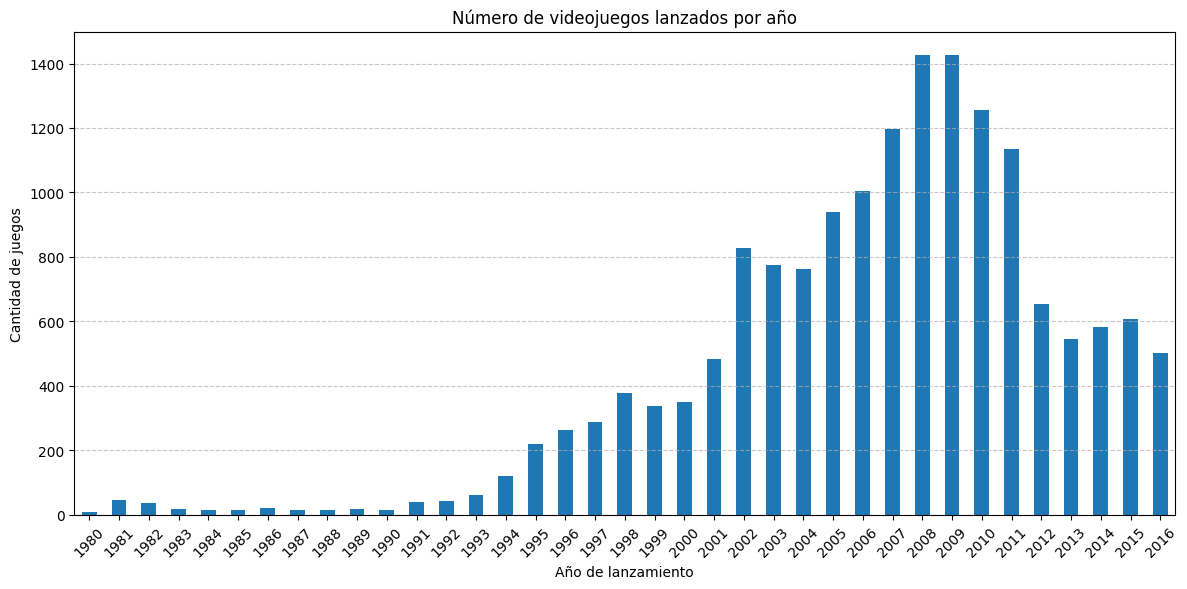

In [23]:
# Filtrar los años válidos
df_filtrado = df[df['year_of_release'] != -1]

# Contar la cantidad de juegos por año
lanzamientos_por_anio = df_filtrado['year_of_release'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
lanzamientos_por_anio.plot(kind='bar')
plt.title('Número de videojuegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El análisis del número de videojuegos lanzados por año revela cambios significativos en la tendencia de producción de títulos a lo largo del tiempo. Uno de los primeros puntos destacados es el aumento abrupto en 2002, cuando la cantidad de lanzamientos creció de aproximadamente 500 juegos en 2001 a más de 800. Este crecimiento puede estar asociado al fortalecimiento de consolas como la PlayStation 2 y al auge de nuevas plataformas en ese periodo.

El pico máximo de lanzamientos se observó entre 2008 y 2009, con más de 1,400 videojuegos publicados en cada uno de esos años. Este fenómeno probablemente responde a una etapa de madurez en la industria de los videojuegos físicos, con una alta demanda global, fuerte competencia entre desarrolladoras, y múltiples plataformas activas en el mercado.

Sin embargo, a partir de 2011 comienza una tendencia decreciente, siendo particularmente evidente en 2012, donde el número de lanzamientos cae por debajo de los 700. A partir de ese momento, la cantidad de títulos se estabiliza en cifras considerablemente más bajas que en la década anterior. Una posible explicación para este cambio es la transformación del modelo de negocio en la industria, con el auge de los **videojuegos en línea, móviles y distribuidos digitalmente**, que no necesariamente se registran en bases de datos centradas en ventas de consolas tradicionales. El desplazamiento hacia plataformas como Steam, Google Play, App Store y juegos en la nube podría haber contribuido a una menor representación de títulos en este tipo de registros.

## Ventas Totales por Plataforma


In [24]:
# Calcular las ventas totales por plataforma
ventas_totales  = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar el resultado
print(ventas_totales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


El análisis de ventas globales acumuladas por plataforma muestra que seis consolas concentran la mayor parte del mercado en el período considerado. La **PS2** lidera con más de **1,062 millones de unidades vendidas**, seguida por **Xbox 360 (885.66M)**, **Wii (828.44M)**, **PS3 (803.97M)**, **Nintendo DS (746.86M)** y **PlayStation original (689.95M)**.

Cada una de estas plataformas supera ampliamente los **400 millones en ventas totales**, mientras que el resto de consolas en la base de datos presentan volúmenes significativamente menores. Por esta razón, estas seis plataformas principales serán el foco del análisis temporal posterior, ya que concentran la mayoría de los lanzamientos y representan una parte sustancial del comportamiento del mercado.

In [25]:
# Seleccionar plataformas con más de 400 millones en ventas
plataformas_top = ventas_totales[ventas_totales > 400].index.tolist()

# Filtrar datos relevantes (años válidos y plataformas seleccionadas)
df_filtrado = df[(df['platform'].isin(plataformas_top)) & (df['year_of_release'] != -1)]

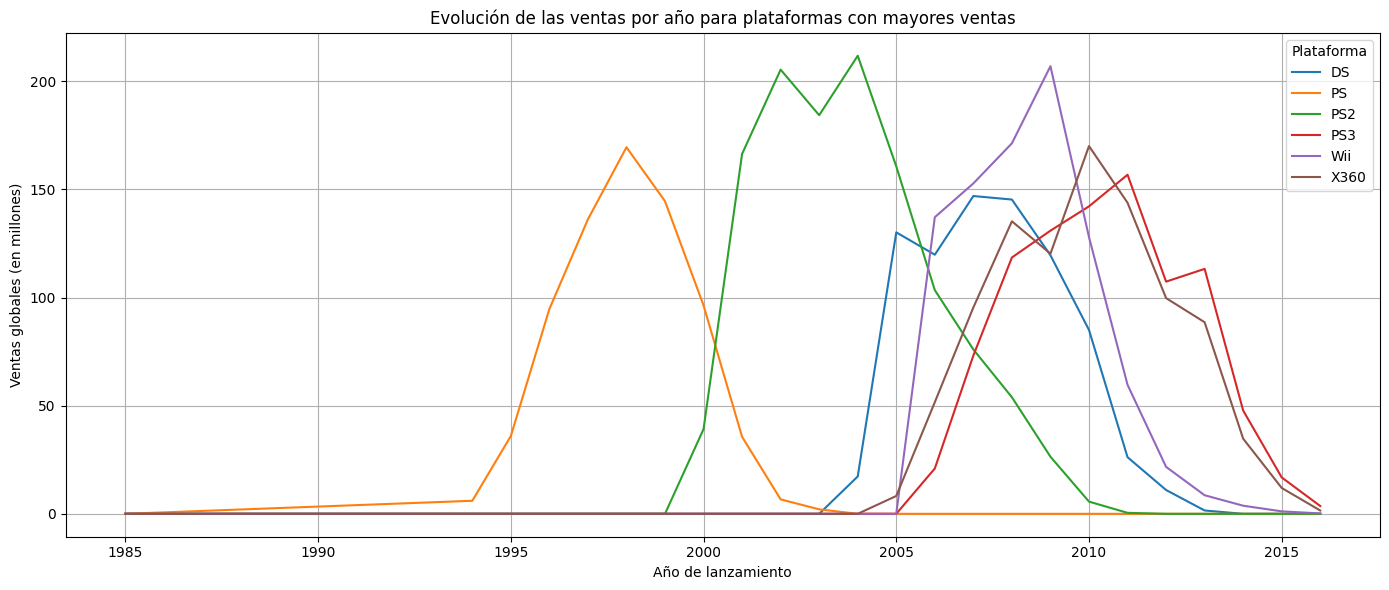

In [26]:
# Agrupar por año y plataforma, sumar ventas
ventas_anuales = df_filtrado.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Graficar la evolución de ventas por plataforma
ventas_anuales.plot(figsize=(14, 6))
plt.title('Evolución de las ventas por año para plataformas con mayores ventas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (en millones)')
plt.grid(True)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()


El análisis de la distribución de ventas por año revela un patrón común en el ciclo de vida de las plataformas: en general, las consolas tienden a alcanzar su **pico de ventas uno o dos años después de su aparición en el mercado**, manteniendo un período de alta popularidad de aproximadamente **cinco años**. Posteriormente, las ventas comienzan a decrecer, coincidiendo con la llegada de nuevas plataformas que capturan la atención del mercado.

Entre las plataformas con mayores ventas, **solo la PS2 y la Xbox 360 lograron extender su relevancia por más de cinco años**, manteniéndose competitivas durante un período ligeramente más prolongado. No obstante, ambas consolas también presentan una **clara tendencia a la baja hacia el final del 2016**, lo que sugiere un posible reemplazo por consolas de nueva generación en los años siguientes.

Estos hallazgos permiten establecer que el ciclo de vida comercial de una plataforma tiende a ser limitado, por lo que es crucial identificar con precisión los momentos de auge y declive para planificar campañas y lanzamientos estratégicos.

## Ventas Totales para los Últimos 5 años

Para construir un análisis robusto que sirva como base para anticipar el comportamiento del mercado en **2017**, se considera pertinente trabajar con los datos más recientes y representativos. En este caso, **se tomará como período de referencia el rango de años entre 2011 y 2016**, ya que incluye tanto la etapa activa de las plataformas dominantes como la transición hacia nuevas generaciones.

Este recorte temporal permitirá capturar las tendencias actuales del mercado sin incluir datos obsoletos de consolas que ya no están vigentes, lo cual es esencial para garantizar la relevancia y precisión del presente análisis.

In [27]:
# Filtrar para el periodo de interés
df_analisis=df[(df['year_of_release'].between(2011, 2016)) &
                  (df['year_of_release'] != -1)]

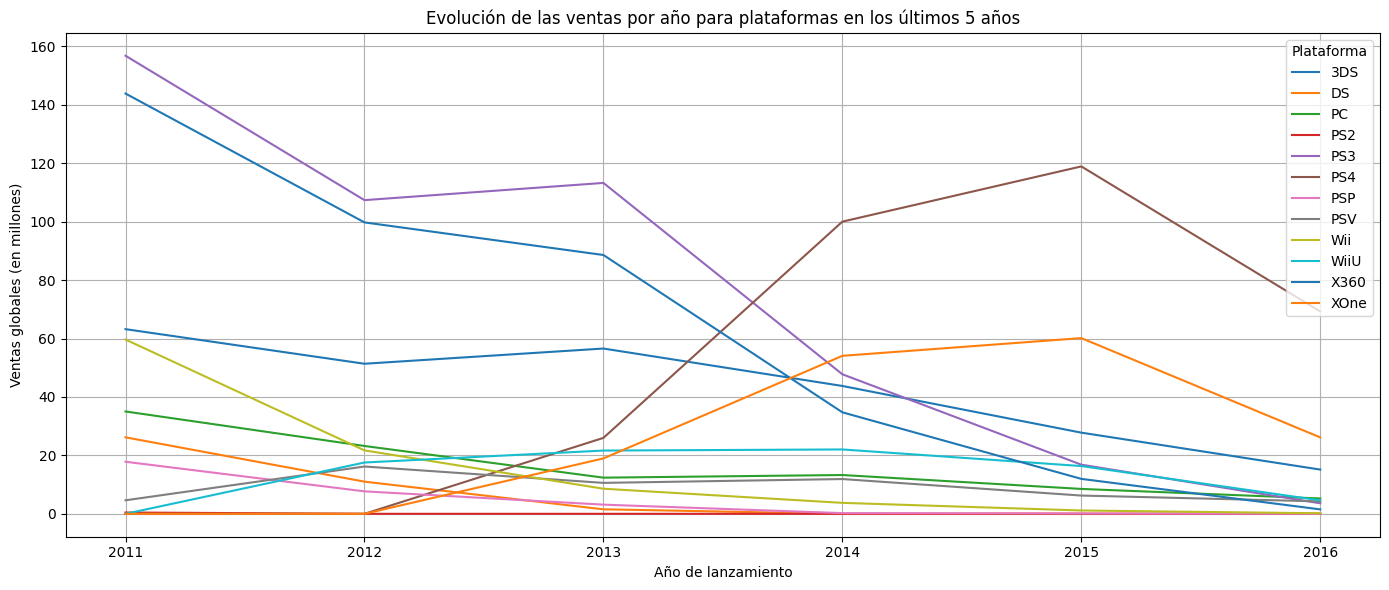

In [28]:
# Agrupar por año y plataforma, sumar ventas
ventas_anuales = df_analisis.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Graficar la evolución de ventas por plataforma
ventas_anuales.plot(figsize=(14, 6))
plt.title('Evolución de las ventas por año para plataformas en los últimos 5 años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (en millones)')
plt.grid(True)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

Con base en el período analizado (2011–2016), se observa que las **plataformas líderes en ventas** durante estos años son principalmente la **PS4**, **XOne** y **PS3**, seguidas por **3DS** y **X360** en los primeros años del período.

- La **PS4** muestra una clara tendencia de crecimiento a partir de su entrada al mercado, alcanzando su punto más alto en 2015, lo cual indica un fuerte posicionamiento y alta rentabilidad reciente.
- La **XOne** también presenta un crecimiento sostenido desde su aparición, aunque con un volumen de ventas ligeramente inferior al de la PS4.
- La **3DS** se mantiene como una plataforma con ventas estables a lo largo del periodo, mostrando una buena resistencia en el mercado portátil.
- Por otro lado, plataformas como la **PS3**, **X360** y **Wii** muestran una **clara tendencia decreciente**, evidenciando el fin de su ciclo de vida.

En función de estas tendencias, se consideran plataformas **potencialmente rentables** para el modelo de 2017: **PS4**, **XOne** y **3DS**, debido a su comportamiento ascendente o estable en los últimos años del período analizado. Estas plataformas muestran señales de mantenerse vigentes y atractivas para el mercado en el futuro cercano.

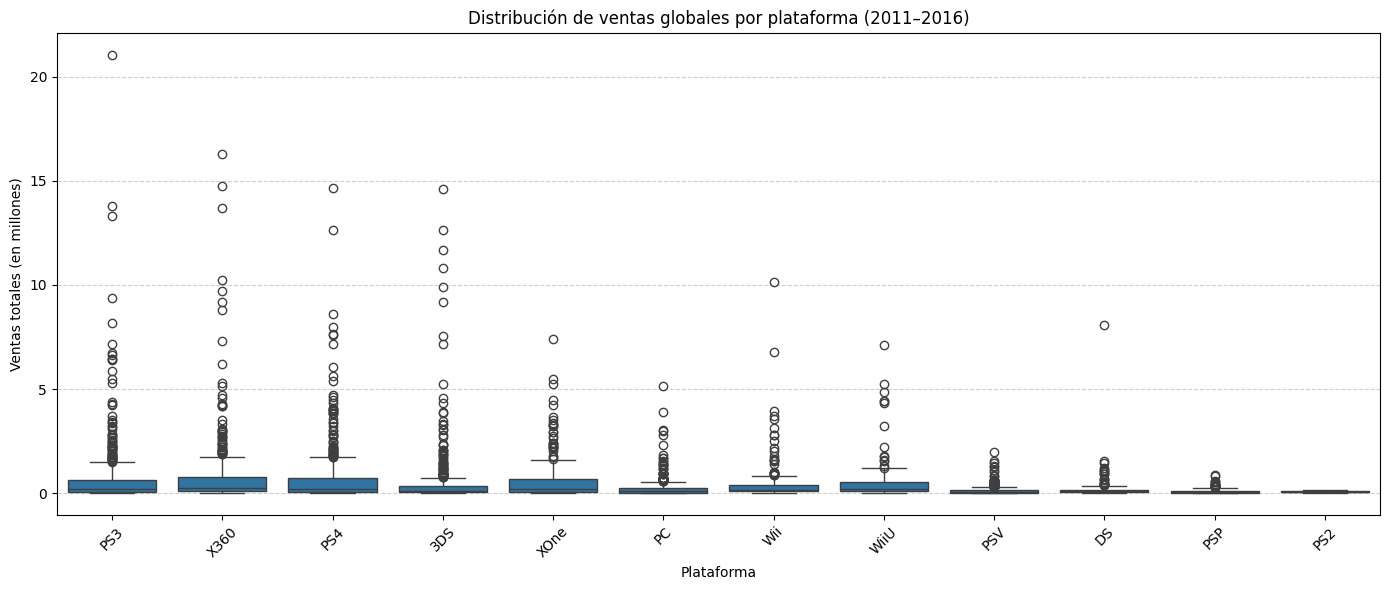

In [29]:
# Calcular orden de plataformas por ventas totales (de mayor a menor)
orden_plataformas = df_analisis.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index

# Establecer el tamaño del gráfico
plt.figure(figsize=(14, 6))

# Crear boxplot ordenado
sns.boxplot(data=df_analisis, x='platform', y='total_sales', order=orden_plataformas)

# Personalizar el gráfico
plt.title('Distribución de ventas globales por plataforma (2011–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Podemos notar que, en general, **sí existe una diferencia significativa** entre las plataformas con mayores ventas totales en el período 2011–2016 y aquellas con menores ventas. Las plataformas más exitosas tienden a tener unos pocos juegos con ventas excepcionalmente altas, que se alejan del comportamiento central de la mayoría de los títulos.

Sin embargo, debido a la gran cantidad de valores atípicos presentes en casi todas las plataformas, no es posible visualizar claramente el centro de cada distribución. Por esta razón, resulta útil complementar el análisis utilizando diagramas de caja que excluyan los outliers, lo que permite comparar mejor las tendencias centrales entre plataformas.

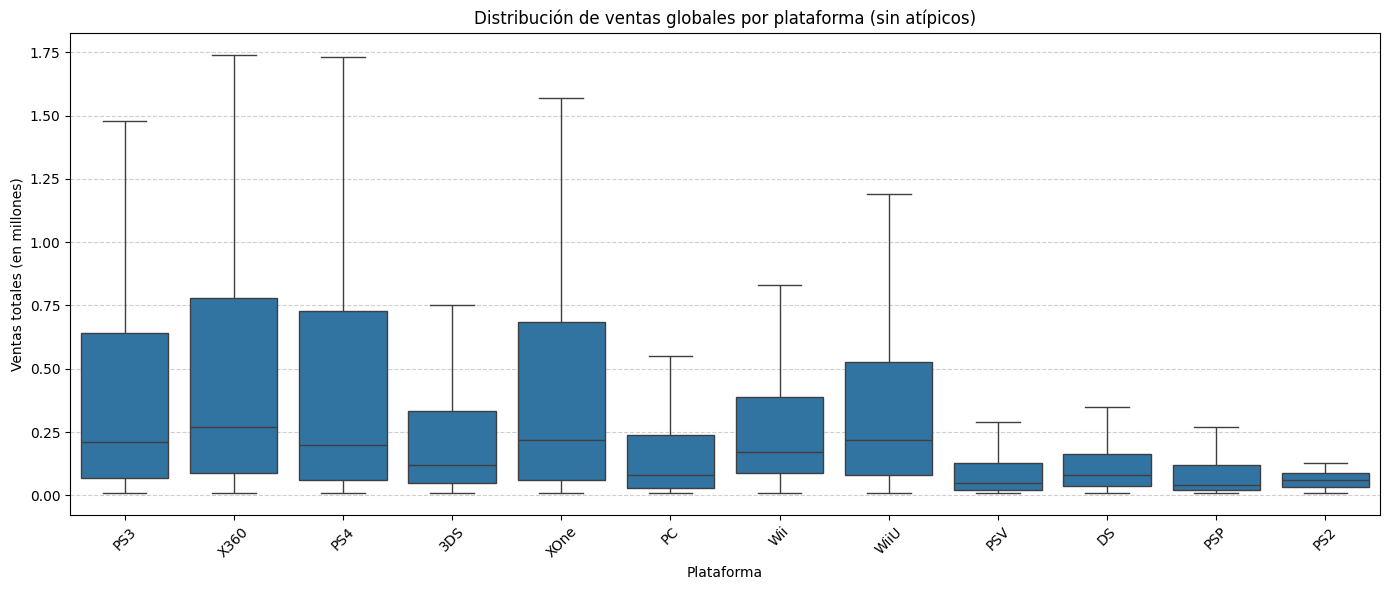

In [30]:
# Establecer el tamaño del gráfico
plt.figure(figsize=(14, 6))

# Crear boxplot sin mostrar los valores atípicos (outliers)
sns.boxplot(data=df_analisis, x='platform', y='total_sales', showfliers=False, order=orden_plataformas)

# Personalizar el gráfico
plt.title('Distribución de ventas globales por plataforma (sin atípicos)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Se pueden apreciar **dos grupos de plataformas** en cuanto al comportamiento central de las ventas de sus juegos. El primer grupo, compuesto por plataformas como **PS3, X360, PS4, 3DS y XOne**, presenta juegos que —sin considerar los valores atípicos— alcanzan ventas de hasta **1.6 millones de unidades**, y donde **más de la mitad de los títulos superan los 150 mil en ventas**. Esto indica una base de títulos más sólida en términos de rendimiento comercial.

El segundo grupo, conformado por plataformas como **DS, PS2, PSP y PSV**, muestra un comportamiento diferente: sus juegos, en general, **no superan los 300 mil en ventas totales**, y las medianas de estas distribuciones son considerablemente más bajas. Esto sugiere un menor volumen de juegos exitosos durante el período analizado o una menor vigencia comercial en los últimos años.

Este análisis sin outliers permite una comparación más clara del desempeño típico de los juegos en cada plataforma, y resalta cuáles han mantenido un portafolio más rentable y competitivo en el mercado reciente.

In [31]:
# Calcular las ventas promedio por plataforma
ventas_promedio = df_analisis.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
display(ventas_promedio)

platform
PS4     0.801378
X360    0.763815
XOne    0.645020
PS3     0.629336
WiiU    0.559116
3DS     0.503535
Wii     0.482335
PC      0.251105
DS      0.210489
PSV     0.125431
PSP     0.092981
PS2     0.064286
Name: total_sales, dtype: float64

Al analizar los promedios de ventas totales por plataforma, se confirma el protagonismo de las mismas plataformas exitosas identificadas previamente. Esto se debe a que no solo cuentan con una base comercial sólida, sino también con títulos que han alcanzado altos niveles de ventas, lo que eleva significativamente su promedio general.

### Análisis del impacto de las reseñas en las ventas para PS3

En esta sección se analizará cómo las **reseñas de usuarios y críticos profesionales** afectan las ventas de los videojuegos en **PS3**. Este tipo de análisis permite entender si las valoraciones públicas influyen directamente en el rendimiento comercial de un título, lo cual puede ser clave para decisiones de marketing y publicación.

Se selecciona PS3 al ser una plataforma con alta representatividad en el mercado de 2011-2016 y con un volumen suficiente de datos disponibles en las columnas `user_score` y `critic_score`. Se crearán **gráficos de dispersión** que relacionen estas puntuaciones con las **ventas globales** y se calcularán los coeficientes de correlación, con el fin de detectar posibles patrones o asociaciones entre las variables.

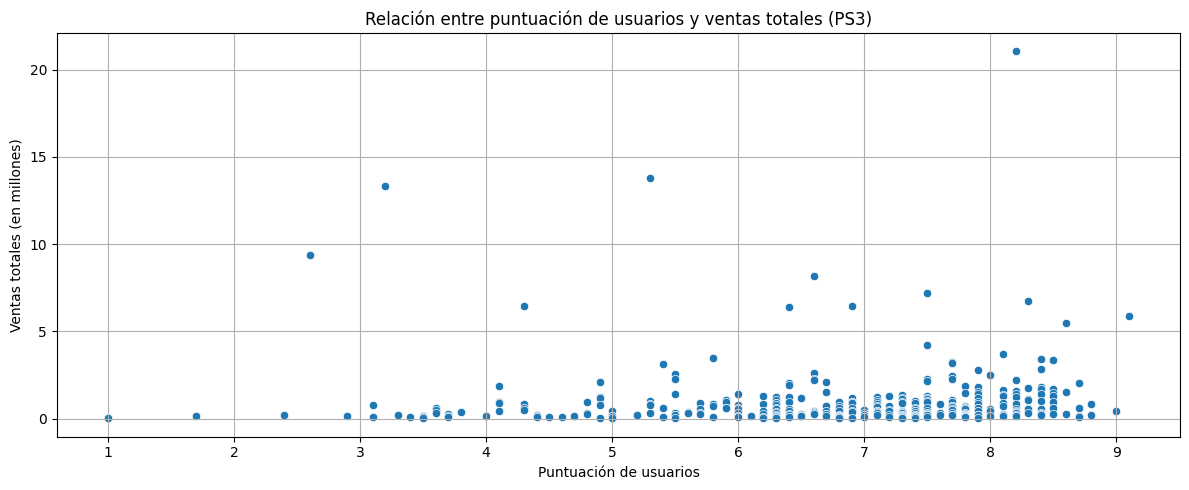

In [32]:
# Filtrar datos para la plataforma PS3 y valores válidos
ps3_data = df_analisis[(df_analisis['platform'] == 'PS3') & 
                       (df_analisis['user_score'] != -1) & 
                       (df_analisis['critic_score'] != -1)]

# Gráfico de dispersión: user_score vs total_sales
plt.figure(figsize=(12, 5))
sns.scatterplot(data=ps3_data, x='user_score', y='total_sales')
plt.title('Relación entre puntuación de usuarios y ventas totales (PS3)')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas totales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

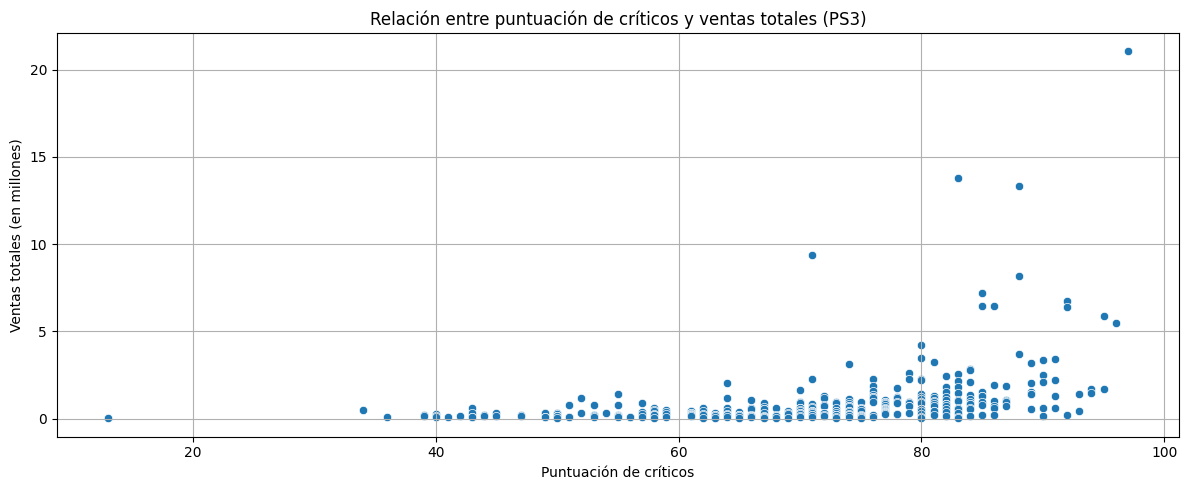

In [33]:
# Gráfico de dispersión: critic_score vs total_sales
plt.figure(figsize=(12, 5))
sns.scatterplot(data=ps3_data, x='critic_score', y='total_sales')
plt.title('Relación entre puntuación de críticos y ventas totales (PS3)')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas totales (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Calcular correlaciones
corr_user = ps3_data['user_score'].corr(ps3_data['total_sales'])
corr_critic = ps3_data['critic_score'].corr(ps3_data['total_sales'])

print(f"Correlación entre user_score y total_sales (PS3): {corr_user:.3f}")
print(f"Correlación entre critic_score y total_sales (PS3): {corr_critic:.3f}")

Correlación entre user_score y total_sales (PS3): 0.025
Correlación entre critic_score y total_sales (PS3): 0.376


Por un lado, la **correlación entre la puntuación de usuarios (`user_score`) y las ventas totales es muy baja (0.024)**, lo que indica prácticamente **ninguna relación lineal** entre estas dos variables. Esto se confirma visualmente en el gráfico de dispersión, donde no se observa una tendencia clara: juegos con puntuaciones altas y bajas presentan niveles similares de ventas.

Por otro lado, la **puntuación de los críticos (`critic_score`) muestra una correlación ligeramente mayor (0.380)** con las ventas totales. El gráfico correspondiente evidencia cierta tendencia ascendente: algunos de los juegos mejor calificados por la crítica tienden a alcanzar mayores niveles de ventas. Si bien esta correlación no es fuerte, sugiere que **las opiniones de los críticos pueden tener cierto peso en el comportamiento de compra de los consumidores**, o bien, que los juegos de mayor calidad (según los críticos) tienden a tener mejores resultados comerciales.

## Análisis de Juegos de PS3 en otras Plataformas


In [35]:
# Crear la lista de juegos para PS3
ps3_juegos = df_analisis[
    (df_analisis['platform'] == 'PS3') &
    (df_analisis['user_score'] != -1) &
    (df_analisis['critic_score'] != -1) &
    (df_analisis['name'].notna())
]['name'].unique()

In [36]:
# Juegos con mismo nombre en diferentes plataformas
juegos_multi = df_analisis[df_analisis['name'].isin(ps3_juegos)]

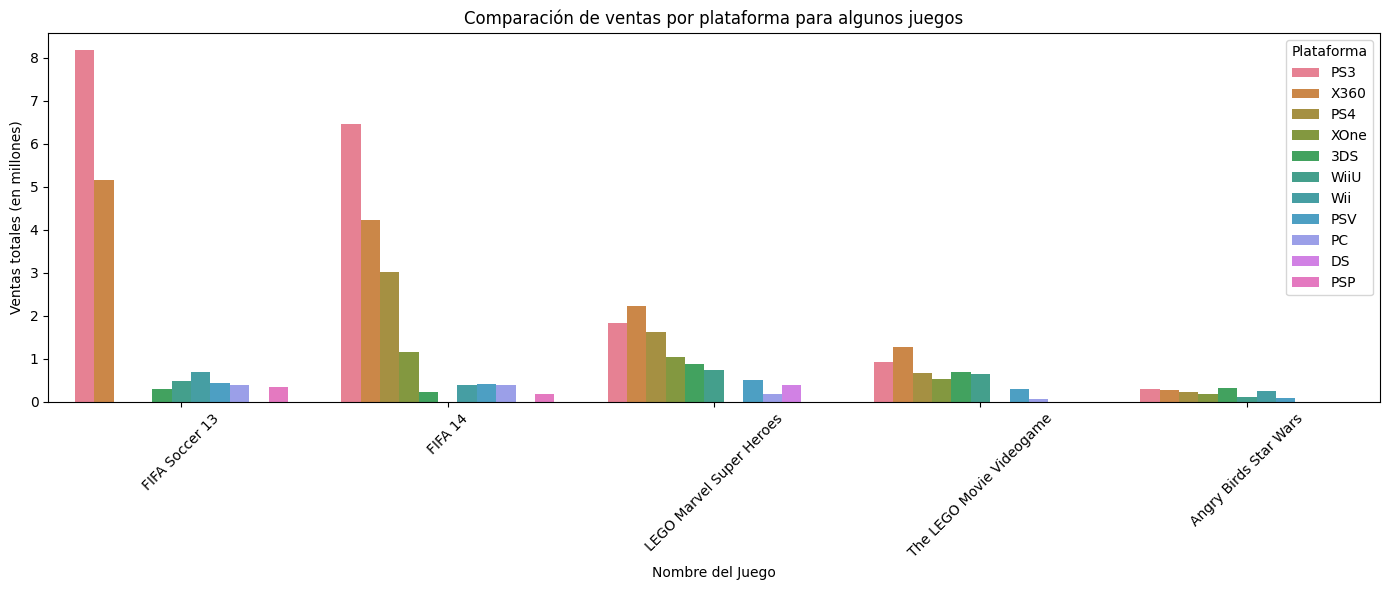

In [37]:
# Elegir un subconjunto representativo (ejemplo: primeros 5 juegos)
ejemplo_juegos = juegos_multi['name'].value_counts()[juegos_multi['name'].value_counts() > 1].index[:5]

# Filtrar los datos de esos juegos
comparacion = juegos_multi[juegos_multi['name'].isin(ejemplo_juegos)]

# Visualizar

plt.figure(figsize=(14, 6))
sns.barplot(data=comparacion, x='name', y='total_sales', hue='platform')
plt.title('Comparación de ventas por plataforma para algunos juegos')
plt.ylabel('Ventas totales (en millones)')
plt.xlabel('Nombre del Juego')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()


La comparación de ventas para varios juegos disponibles en múltiples plataformas revela diferencias importantes en el rendimiento comercial según la consola. Por ejemplo, **FIFA Soccer 13** y **FIFA 14** alcanzan sus mayores ventas en **PS3** y **X360**, sin embargo, para Fifa 14 le sigue **PS4** y **XOne** en ventas, mientras que para Fifa Soccer 13 estas dos últimas consolas no tienen ventas significativas. siendo así, el análisis sugiere que estas plataformas eran dominantes en términos de adopción y preferencia de los usuarios durante el período analizado.

En el caso de **LEGO Marvel Super Heroes**, aunque las ventas están más distribuidas entre varias consolas, se observa una mayor concentración en **PS3**, **X360** y algunas plataformas portátiles como **3DS** y **PSV**, lo que evidencia que este tipo de títulos logra una buena acogida también fuera de las consolas principales.

Otros juegos como **Terraria** y **Angry Birds Star Wars** muestran ventas mucho más modestas y distribuidas de forma más pareja entre plataformas, sin una consola claramente dominante.

## Distribución de ventas segpun género 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20852\2437225466.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_generos.index, y=conteo_generos.values, palette='viridis')


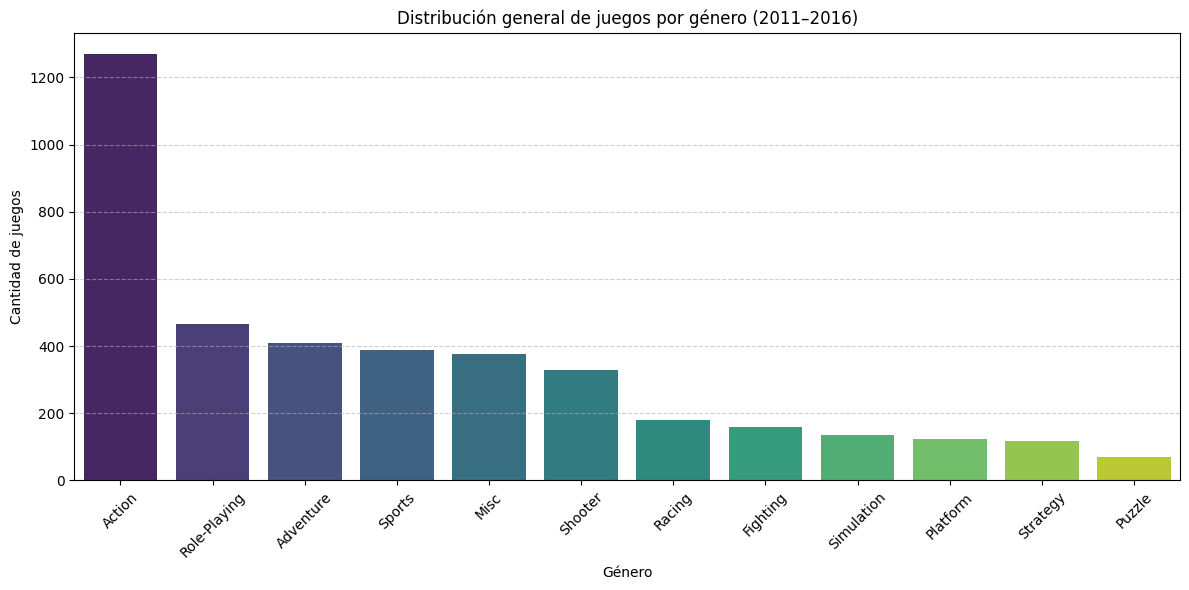

In [38]:
# Contar la cantidad de juegos por género
conteo_generos = df_analisis['genre'].value_counts().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_generos.index, y=conteo_generos.values, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución general de juegos por género (2011–2016)')
plt.xlabel('Género')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

La distribución de los juegos por género en el período 2011–2016 muestra una clara dominancia del género **Action**, con más de 1,200 títulos registrados. Este resultado refleja tanto la alta demanda de este tipo de juegos como la amplia oferta por parte de los desarrolladores, lo cual posiciona al género como el más representado del mercado.

A considerable distancia le siguen los géneros **Role-Playing**, **Adventure**, **Sports** y **Misc**, todos con una cantidad moderada de lanzamientos, entre 350 y 500 juegos. Esto indica que, aunque menos abundantes que los juegos de acción, estos géneros siguen teniendo una presencia relevante y constante en el mercado.

Por otro lado, géneros como **Strategy**, **Platform**, **Simulation** y **Puzzle** presentan una menor cantidad de títulos, lo que sugiere un nicho más específico o una menor inversión por parte de las desarrolladoras en estas categorías durante el período analizado. 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20852\2949365969.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_genero.index, y=ventas_por_genero.values, palette='magma')


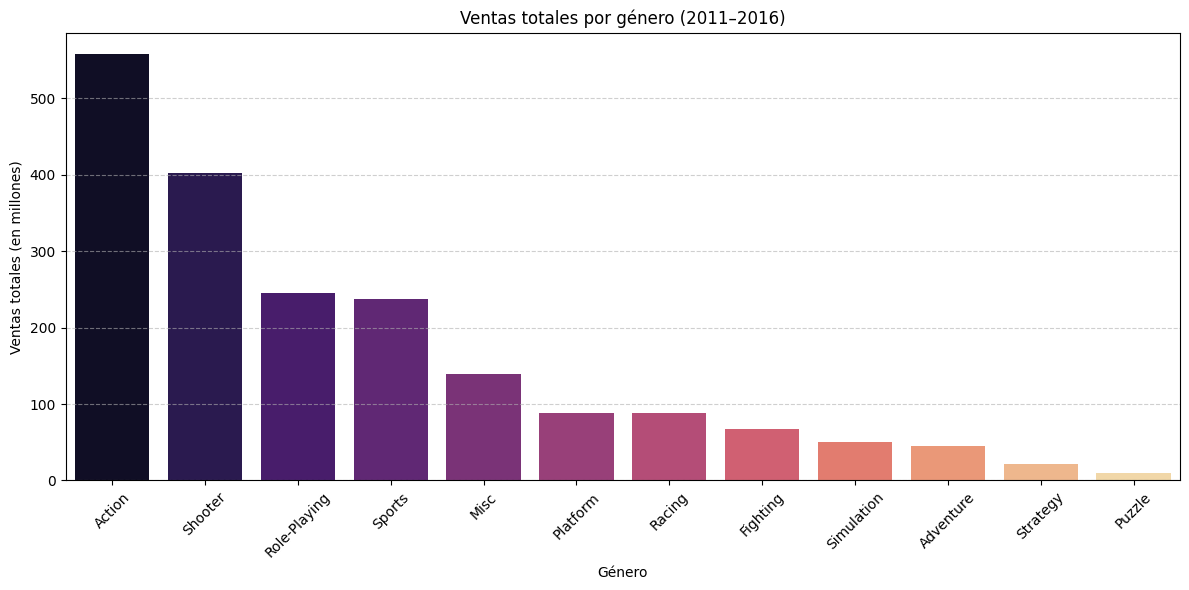

In [39]:
# Calcular ventas totales por género
ventas_por_genero = df_analisis.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_por_genero.index, y=ventas_por_genero.values, palette='magma')

# Personalizar el gráfico
plt.title('Ventas totales por género (2011–2016)')
plt.xlabel('Género')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


El análisis de las ventas totales por género en el período 2011–2016 confirma que el género **Action** no solo es el más representado en cuanto a cantidad de títulos (más de 1,200), sino también el más rentable en términos absolutos, con cerca de **500 millones de unidades vendidas**. Le siguen los géneros **Shooter**, **Role-Playing** y **Sports**, todos con cifras de ventas elevadas, superiores a los 200 millones, lo que evidencia su fuerte presencia tanto en oferta como en demanda.

Sin embargo, es interesante observar que, aunque los géneros distintos a Action **no alcanzan ni la mitad del número de títulos** publicados bajo ese género, las ventas **no reflejan una diferencia tan abismal**. Este contraste es especialmente evidente en el caso de **Shooter**, que fue el sexto género en número de lanzamientos, pero logró generar alrededor de **350 millones en ventas totales**, superando ampliamente a otros géneros con mayor volumen de títulos. Esto sugiere una **mayor eficiencia comercial** en géneros como Shooter, donde menos títulos logran concentrar un alto volumen de ventas.

Por otro lado, géneros como **Puzzle**, **Strategy**, **Adventure** y **Simulation** registran tanto una baja cantidad de títulos como niveles de ventas significativamente más bajos (menores a 100 millones de unidades en total). Esto podría deberse a que estos géneros apuntan a un nicho más específico de jugadores, presentan menor inversión en marketing, o simplemente no logran generar el mismo interés comercial que los géneros dominantes. Si bien tienen su espacio en el mercado, su impacto económico es considerablemente más limitado.

# 4. Perfil de Usuario por Región

En esta sección se analizará el comportamiento del mercado de videojuegos en tres regiones clave: **Norteamérica (NA)**, **Europa (EU)** y **Japón (JP)**. El objetivo es identificar las particularidades de cada mercado y construir un perfil de usuario típico en función de sus preferencias de plataforma, género y recepción frente a las clasificaciones ESRB.

Para ello, se determinarán las **cinco plataformas con mayores ventas en cada región**, comparando su cuota de mercado relativa y observando las variaciones en la popularidad de las consolas entre zonas geográficas. También se identificarán los **cinco géneros más populares por región**, lo cual permitirá comprender las diferencias culturales en el consumo de videojuegos.

Finalmente, se evaluará si las **clasificaciones de la ESRB** (sistema de clasificación por edades utilizado principalmente en Estados Unidos) influyen en el comportamiento de compra en cada región, lo que podría revelar la importancia relativa que los consumidores de distintas zonas otorgan a las restricciones por edad.

## Plataformas Principales por Región

In [40]:
# Calcular las ventas totales por plataforma para cada región
ventas_na = df_analisis.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
ventas_eu = df_analisis.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
ventas_jp = df_analisis.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar resultados
print("Top 5 plataformas en Norteamérica:\n", ventas_na)
print("\nTop 5 plataformas en Europa:\n", ventas_eu)
print("\nTop 5 plataformas en Japón:\n", ventas_jp)

Top 5 plataformas en Norteamérica:
 platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64

Top 5 plataformas en Europa:
 platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64

Top 5 plataformas en Japón:
 platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64


In [41]:
#  Calcular ventas totales por plataforma y región
ventas_na = df_analisis.groupby('platform')['na_sales'].sum()
ventas_eu = df_analisis.groupby('platform')['eu_sales'].sum()
ventas_jp = df_analisis.groupby('platform')['jp_sales'].sum()


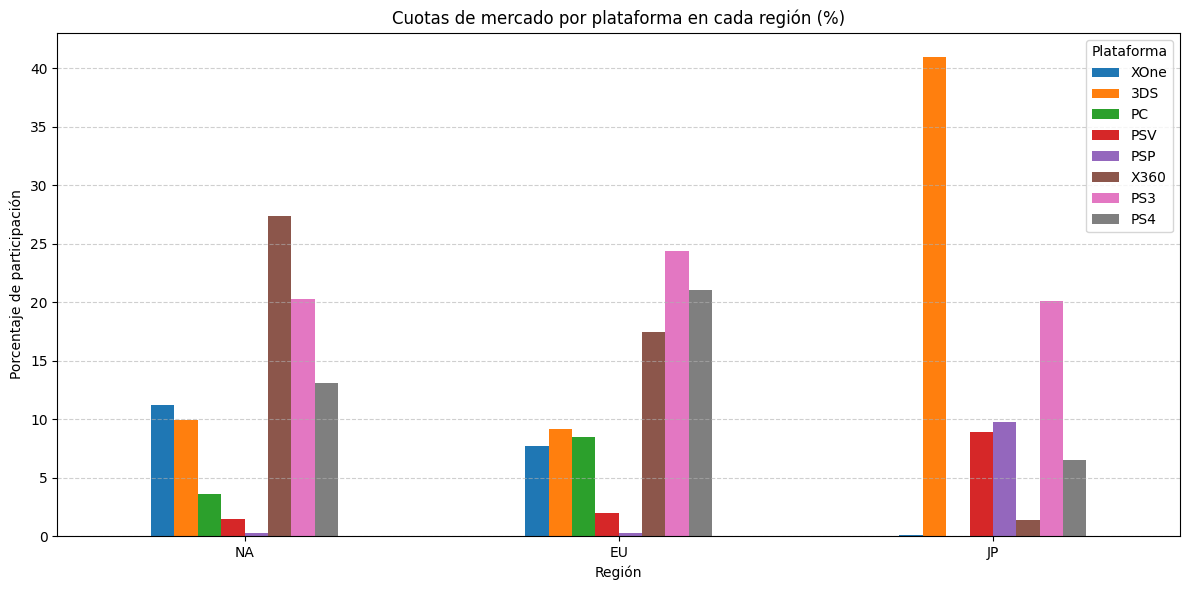

In [43]:
# Unirlos en un solo DataFrame
ventas_regionales = pd.DataFrame({
    'NA': ventas_na,
    'EU': ventas_eu,
    'JP': ventas_jp
}).fillna(0)

# Calcular la cuota de mercado por región (dividir por el total de ventas de la región)
cuota_mercado = ventas_regionales.div(ventas_regionales.sum(), axis=1) * 100

# Filtrar solo las plataformas top (por ejemplo, las que aparecen al menos en top 5 de alguna región)
plataformas_top = set(ventas_na.sort_values(ascending=False).head(5).index) | \
                  set(ventas_eu.sort_values(ascending=False).head(5).index) | \
                  set(ventas_jp.sort_values(ascending=False).head(5).index)

cuota_top = cuota_mercado.loc[list(plataformas_top)]

# Graficar
cuota_top.T.plot(kind='bar', figsize=(12,6))
plt.title('Cuotas de mercado por plataforma en cada región (%)')
plt.ylabel('Porcentaje de participación')
plt.xlabel('Región')
plt.xticks(rotation=0)
plt.legend(title='Plataforma')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


El análisis de las cuotas de mercado revela diferencias claras en las preferencias de plataformas según la región:

- En **Norteamérica**, las plataformas dominantes son **X360** y **PS3**, con cuotas cercanas o superiores al 20%. También destaca la participación de **XOne** y **PS4**, lo que indica una fuerte presencia de consolas de Microsoft y Sony en este mercado. La participación de **plataformas portátiles** como la 3DS o PSV es más limitada.

- En **Europa**, la distribución es más equilibrada, con **PS3** liderando con cerca del 25%, seguida de **PS4** y **X360**, ambas con una cuota de mercado significativa. También se observa una mayor presencia relativa de **PC**, lo que podría indicar una mayor preferencia por el juego en computadora en comparación con otras regiones.

- En **Japón**, el panorama cambia drásticamente: la consola **3DS** domina con más del 40% del mercado, mientras que **PS3** y **PSP** también tienen una participación destacada. Las plataformas occidentales como **X360** y **XOne** presentan cuotas muy bajas, lo que evidencia una **preferencia clara por consolas de origen japonés** en esta región.

## Géneros Principales por Región

In [44]:
# Agrupar ventas por género en cada región
ventas_genero_na = df_analisis.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
ventas_genero_eu = df_analisis.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
ventas_genero_jp = df_analisis.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar resultados
print("Top 5 géneros en Norteamérica:\n", ventas_genero_na)
print("\nTop 5 géneros en Europa:\n", ventas_genero_eu)
print("\nTop 5 géneros en Japón:\n", ventas_genero_jp)


Top 5 géneros en Norteamérica:
 genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64

Top 5 géneros en Europa:
 genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64

Top 5 géneros en Japón:
 genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64


El análisis de los cinco géneros con mayores ventas en cada región muestra diferencias notables en las preferencias de los consumidores de videojuegos según su ubicación geográfica.

En **Norteamérica** y **Europa**, las similitudes son evidentes: ambos mercados están dominados por los géneros **Action**, **Shooter** y **Sports**, con ventas superiores a los 80 millones de unidades. Esto indica una clara preferencia por juegos de ritmo rápido, competitivos y con componentes multijugador o deportivos. En ambas regiones, el género **Role-Playing** también figura dentro del top 5, aunque con menor volumen de ventas. La diferencia principal radica en que **Norteamérica** incluye el género **Misc** (títulos misceláneos o difíciles de clasificar), mientras que **Europa** destaca el género **Racing**.

En contraste, **Japón** muestra un perfil de usuario muy distinto. El género **Role-Playing** lidera claramente con casi 80 millones en ventas, seguido por **Action**, pero con cifras más moderadas. También aparecen géneros menos comunes en los rankings occidentales, como **Misc**, **Fighting** y **Platform**, lo que sugiere una preferencia más marcada por juegos de estilo tradicional japonés, aventuras narrativas y plataformas clásicas. Sorprendentemente, géneros muy populares en Occidente como **Shooter** y **Sports** no figuran dentro del top 5 en Japón.

## Ventas según Clasificación ESRB por Región

In [45]:
# Agrupar ventas por clasificación ESRB
ventas_rating = df_analisis.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Mostrar resultados ordenados
ventas_rating = ventas_rating.sort_values(by='na_sales', ascending=False)

ventas_rating=ventas_rating.T
print(ventas_rating)


rating         M       E  Unkown    E10+       T    EC    RP
na_sales  308.45  170.17  123.69  117.72  109.31  0.42  0.00
eu_sales  250.26  141.73  116.61   78.00   83.16  0.00  0.03
jp_sales   26.14   36.68  138.21   11.23   33.39  0.00  0.00


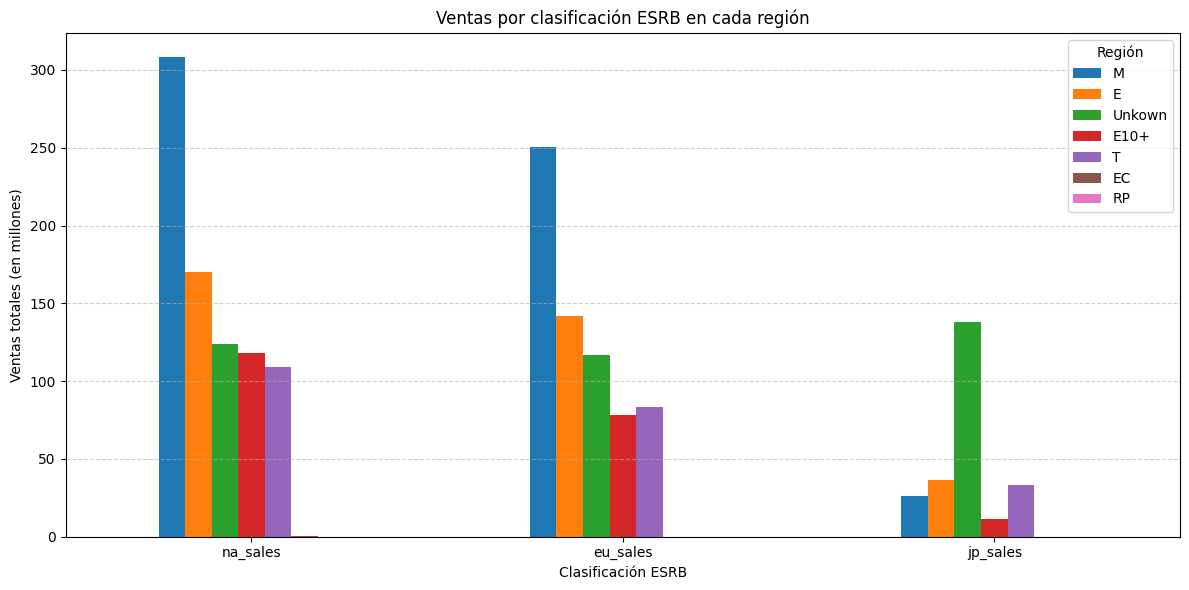

In [46]:
# Crear gráfico
ventas_rating.plot(kind='bar', figsize=(12,6))
plt.title('Ventas por clasificación ESRB en cada región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=0)
plt.legend(title='Región')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


El gráfico muestra cómo varían las ventas totales de videojuegos en función de la clasificación ESRB para cada región, y permite identificar si estas clasificaciones tienen un impacto relevante en el comportamiento de compra.

En **Norteamérica (NA)** y **Europa (EU)**, se observa que los juegos clasificados como **M (Mature)** lideran ampliamente en ventas, con más de **300 millones en NA** y **250 millones en EU**, respectivamente. Esto indica que los consumidores de estas regiones **aceptan con facilidad juegos con contenido para adultos**, probablemente influenciados por la popularidad de géneros como Shooter y Action. Le siguen los juegos clasificados como **E (Everyone)**, lo que evidencia también un buen rendimiento de títulos orientados a todo público.

En **Japón (JP)**, la situación es completamente diferente: la clasificación **Unknown** lidera las ventas, seguida por **E** y luego **T (Teen)**. Esto sugiere que en esta región la **clasificación ESRB tiene un impacto menos claro**, posiblemente porque **no es el sistema de clasificación nativo** (en Japón se usa principalmente el sistema CERO). También podría deberse a un mayor número de juegos locales sin clasificación ESRB registrada, lo que explicaría la alta participación de la categoría "Unknown".

# 5. Pruebas de Hipótesis

## Prueba de Diferencia de Calificaciones Promedio para Xbox One y PC.
En esta sección se evaluará si existen diferencias significativas en las calificaciones promedio otorgadas por los usuarios a Xbox One y PC. Se formulan las siguientes hipótesis:

- **H₀:** No hay diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y las de PC.
- **Ha:** Sí existe una diferencia significativa entre las calificaciones promedio de los usuarios para Xbox One y las de PC.

Se utilizará una **prueba de hipótesis para la diferencia de medias de dos muestras independientes**, ya que se comparan puntuaciones de usuarios entre grupos distintos. El criterio elegido es la **prueba t de Student**. Si las varianzas entre grupos son significativamente distintas, se empleará la versión **con varianzas desiguales** (prueba de Welch), lo cual se verificará con base en una prueba previa de igualdad de varianzas.

Se definirá **α = 0.05**.


In [47]:
# Filtrar solo datos válidos para Xbox One y PC
# Asegúrate de que user_score esté convertido a float y -1 se use como NaN o marcador
filtro = (df_analisis['platform'].isin(['XOne', 'PC'])) & (df_analisis['user_score'] != -1)
df_valido = df_analisis[filtro].copy()

# Obtener las muestras
xbox_scores = df_valido[df_valido['platform'] == 'XOne']['user_score']
pc_scores = df_valido[df_valido['platform'] == 'PC']['user_score']

In [48]:
# Paso 1: Prueba de igualdad de varianzas (Levene)
stat_levene, p_levene = stats.levene(xbox_scores, pc_scores)

print(f"Prueba de Levene - Estadístico: {stat_levene:.3f}, p-valor: {p_levene:.4f}")

Prueba de Levene - Estadístico: 5.516, p-valor: 0.0192


Dado un nivel de significancia de α = 0.05, se rechaza la hipótesis nula. Esto indica que existe evidencia suficiente para concluir que las varianzas entre los dos grupos son significativamente diferentes.

In [49]:
# Paso 2: Prueba t para diferencia de medias
# Si p > 0.05 asumimos varianzas iguales, si p <= 0.05 usamos Welch (varianzas desiguales)
equal_var = p_levene > 0.05

stat_t, p_t = stats.ttest_ind(xbox_scores, pc_scores, equal_var=equal_var)

print(f"\nPrueba t - Estadístico t: {stat_t:.3f}, p-valor: {p_t:.4f}")
if p_t < 0.05:
    print("→ Se rechaza la hipótesis nula: hay diferencia significativa entre las medias.")
else:
    print("→ No se rechaza la hipótesis nula: no hay diferencia significativa entre las medias.")



Prueba t - Estadístico t: 0.506, p-valor: 0.6131
→ No se rechaza la hipótesis nula: no hay diferencia significativa entre las medias.


La prueba t arrojó un estadístico t = 0.506 y un valor p = 0.6131.  
Dado que el valor p es mayor al nivel de significancia α = 0.05, **no se rechaza la hipótesis nula**.  
Por lo tanto, no se encontró evidencia estadísticamente significativa para afirmar que existe una diferencia entre las calificaciones promedio de usuarios entre las plataformas Xbox One y PC. Las diferencias observadas pueden deberse al azar.

## Prueba de Diferencia de Calificaciones Promedio para Videojuegos de Acción y Deportes.
En esta sección se evaluará si existen diferencias significativas en las calificaciones promedio otorgadas por los usuarios a los videojuegos de Acción y de Deportes. Se formulan las siguientes hipótesis:

- **H₀:** No hay diferencia significativa entre las calificaciones promedio de los usuarios para videojuegos de Acción y de Deportes.
- **Ha:** Sí existe una diferencia significativa entre las calificaciones promedio de los usuariospara videojuegos de Acción y de Deportes

Se utilizará una **prueba de hipótesis para la diferencia de medias de dos muestras independientes**, ya que se comparan puntuaciones de usuarios entre grupos distintos. El criterio elegido es la **prueba t de Student**. Si las varianzas entre grupos son significativamente distintas, se empleará la versión **con varianzas desiguales** (prueba de Welch), lo cual se verificará con base en una prueba previa de igualdad de varianzas.

Se definirá **α = 0.05**.

In [50]:
# Filtrar datos válidos de los géneros "Action" y "Sports"
filtro = (df_analisis['genre'].isin(['Action', 'Sports'])) & (df_analisis['user_score'] != -1)
df_generos = df_analisis[filtro].copy()

# Obtener las muestras
action_scores = df_generos[df_generos['genre'] == 'Action']['user_score']
sports_scores = df_generos[df_generos['genre'] == 'Sports']['user_score']

# Paso 1: Prueba de igualdad de varianzas (Levene)
stat_levene, p_levene = stats.levene(action_scores, sports_scores)
print(f"Prueba de Levene - Estadístico: {stat_levene:.3f}, p-valor: {p_levene:.4f}")

# Paso 2: Prueba t para diferencia de medias
equal_var = p_levene > 0.05  # usar Welch si varianzas son diferentes

stat_t, p_t = stats.ttest_ind(action_scores, sports_scores, equal_var=equal_var)

# Mostrar resultado
print(f"\nPrueba t - Estadístico t: {stat_t:.3f}, p-valor: {p_t:.4f}")
if p_t < 0.05:
    print("→ Se rechaza la hipótesis nula: hay diferencia significativa entre las medias.")
else:
    print("→ No se rechaza la hipótesis nula: no hay diferencia significativa entre las medias.")


Prueba de Levene - Estadístico: 18.398, p-valor: 0.0000

Prueba t - Estadístico t: 9.361, p-valor: 0.0000
→ Se rechaza la hipótesis nula: hay diferencia significativa entre las medias.


La prueba de Levene arrojó un estadístico de 18.398 con un valor p de 0.0000, lo que indica una diferencia significativa entre las varianzas de las calificaciones de usuarios para los géneros Acción y Deportes. Por ello, se aplicó la prueba t de Student con corrección para varianzas desiguales (Welch).

La prueba t resultó en un estadístico t = 9.361 y un valor p = 0.0000. Dado que el valor p es menor al nivel de significancia α = 0.05, se **rechaza la hipótesis nula**. Esto sugiere que existe una **diferencia estadísticamente significativa entre las calificaciones promedio** otorgadas por los usuarios a los juegos de género Acción y los de Deportes.

# 6. Conclusiones

Este análisis tuvo como objetivo explorar los factores que pueden influir en el éxito comercial de los videojuegos, considerando variables como plataforma, género, región y calificaciones de usuarios y críticos. A través de pruebas estadísticas y análisis exploratorios, se obtuvieron las siguientes conclusiones clave:

1. **Relación entre reseñas y ventas**  
   Se encontró que las calificaciones de los críticos presentan una **correlación positiva leve** con las ventas (r ≈ 0.38) en la plataforma PS3, lo que sugiere que mejores evaluaciones profesionales pueden estar asociadas con un mayor rendimiento comercial. En contraste, las calificaciones de los usuarios mostraron una **correlación casi nula** (r ≈ 0.02), indicando que la opinión del público general no necesariamente predice las ventas de forma significativa.

2. **Comparación de ventas para juegos multiplataforma**  
   La comparación de algunos títulos lanzados en varias plataformas reveló que las versiones para **PS3 y X360** suelen concentrar la mayor parte de las ventas. Esto resalta la importancia de considerar la plataforma como un factor estratégico de distribución.

3. **Preferencias regionales**  
   El análisis por región mostró patrones de consumo diferenciados:
   - En **Norteamérica y Europa**, los géneros más populares son **Action, Shooter y Sports**, y las plataformas líderes incluyen **PS3, X360, PS4 y XOne**.
   - En **Japón**, se observa una marcada preferencia por **Role-Playing y plataformas portátiles**, con la **3DS** dominando ampliamente el mercado.

4. **Clasificación ESRB y comportamiento de compra**  
   Las clasificaciones **M (Mature)** y **E (Everyone)** concentran la mayoría de las ventas en América y Europa, mientras que en Japón, la categoría **Unknown** lidera, posiblemente por la baja presencia del sistema ESRB en ese mercado. Esto sugiere que las clasificaciones ESRB sí afectan el comportamiento de compra en regiones donde este sistema es oficialmente adoptado.

5. **Pruebas de hipótesis sobre calificaciones de usuarios**
   - **Xbox One vs. PC**: No se encontró evidencia estadística suficiente para afirmar que las calificaciones promedio de los usuarios difieren entre estas dos plataformas (p = 0.6131). Se concluye que no hay diferencia significativa.
   - **Géneros Acción vs. Deportes**: La prueba t reveló una diferencia estadísticamente significativa (p < 0.0001), lo que indica que los usuarios **califican de forma distinta** los juegos de estos dos géneros. Además, se confirmó que las varianzas también difieren significativamente, por lo que se aplicó la prueba t con corrección de Welch.

En conjunto, los resultados evidencian que **factores como la región geográfica, la plataforma de lanzamiento, el género del juego y las calificaciones de los críticos** pueden jugar un papel relevante en las ventas. Asimismo, las diferencias de percepción por parte de los usuarios entre géneros también son significativas, lo cual puede ser útil para orientar decisiones de desarrollo, marketing y segmentación de campañas.
